In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

In [12]:
tracks = pd.read_csv('spotify_tracks.csv')
tracks

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.02410,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.08510,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.03110,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.22700,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.01530,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62312,3eHDwMQYPEziy2DWRBNoLv,Sani - G.O.A.T Remix,"Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...",2021,30,https://i.scdn.co/image/ab67616d0000b273819d23...,Sani (G.O.A.T Remix),0.08490,0.877,359718.0,...,7.0,0.1100,-11.458,1.0,0.3530,100.024,4.0,0.504,https://open.spotify.com/track/3eHDwMQYPEziy2D...,Tamil
62313,5hHtCqkNv5eo99OrEFFcgS,Life of Bachelor,"A H Kaashif, Navakkarai Naveen Prabanjam, Asal...",2021,30,https://i.scdn.co/image/ab67616d0000b2736cd651...,Bachelor (Original Motion Picture Soundtrack),0.07880,0.833,154364.0,...,8.0,0.2670,-5.061,1.0,0.0813,110.041,4.0,0.524,https://open.spotify.com/track/5hHtCqkNv5eo99O...,Tamil
62314,08foF9YHgKmIgOy3xMWRZy,Yo Baby,"Rakesh Ambigapathy, Asal Kolaar, MC Vickey",2021,18,https://i.scdn.co/image/ab67616d0000b27300da25...,Yo Baby,0.00918,0.842,234000.0,...,7.0,0.0790,-5.855,1.0,0.1370,122.038,4.0,0.669,https://open.spotify.com/track/08foF9YHgKmIgOy...,Tamil
62315,2wLFbVlQGKJSd9lwzwL47F,Fast Fast Vadiley,"Asal Kolaar, Priyadarshan Balasubramanian",2021,1,https://i.scdn.co/image/ab67616d0000b273e051e1...,Arjuna Phalguna,0.10100,0.682,180807.0,...,1.0,0.3200,-6.061,1.0,0.2850,74.993,4.0,0.439,https://open.spotify.com/track/2wLFbVlQGKJSd9l...,Tamil


In [13]:
tracks.describe()

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,62317.000000,62317.000000,62317.000000,62317.000000,6.231700e+04,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000,62317.000000
mean,2014.425935,15.358361,0.362292,0.596807,2.425270e+05,0.602496,0.146215,5.101658,0.194143,-65.103433,0.586052,0.087722,117.931247,3.857086,0.495226
std,9.645113,18.626908,0.314609,0.186209,1.129999e+05,0.246144,0.307804,3.553469,0.172030,2369.051478,0.493682,0.115150,28.509459,0.502660,0.264787
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2011.000000,0.000000,0.067100,0.497000,1.921600e+05,0.440000,0.000000,2.000000,0.093200,-10.727000,0.000000,0.036700,95.942000,4.000000,0.292000
50%,2017.000000,7.000000,0.286000,0.631000,2.362670e+05,0.639000,0.000025,5.000000,0.125000,-7.506000,1.000000,0.048900,117.991000,4.000000,0.507000
75%,2022.000000,26.000000,0.632000,0.730000,2.862400e+05,0.803000,0.015200,8.000000,0.243000,-5.456000,1.000000,0.089100,135.081000,4.000000,0.710000
max,2024.000000,93.000000,0.996000,0.986000,4.581483e+06,1.000000,0.999000,11.000000,0.998000,1.233000,1.000000,0.959000,239.970000,5.000000,0.995000


In [14]:

# Check for missing values
print(tracks.isnull().sum())

# Identify invalid values (e.g., negative values in columns that should be non-negative)
invalid_rows = tracks[
    (tracks['acousticness'] < 0) |
    (tracks['danceability'] < 0) |
    (tracks['energy'] < 0) |
    (tracks['instrumentalness'] < 0) |
    (tracks['key'] < 0) |
    (tracks['liveness'] < 0) |
    (tracks['speechiness'] < 0) |
    (tracks['tempo'] < 0) |
    (tracks['time_signature'] < 0) |
    (tracks['valence'] < 0)
]
print(f"Number of rows with invalid values: {len(invalid_rows)}")

# Replace negative values with NaN (or you could drop them)
import numpy as np
numeric_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
                'liveness', 'speechiness', 'tempo', 'time_signature', 'valence']
tracks[numeric_cols] = tracks[numeric_cols].apply(lambda x: x.where(x >= 0, np.nan))

# Check for duplicates based on track_id
duplicates = tracks.duplicated(subset='track_id').sum()
print(f"Number of duplicate track IDs: {duplicates}")

# Convert duration_ms to seconds for easier interpretation
tracks['duration_s'] = tracks['duration_ms'] / 1000

# Drop rows with missing critical values (if needed)
tracks_clean = tracks.dropna(subset=['track_name', 'artist_name', 'popularity'])




track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64
Number of rows with invalid values: 35
Number of duplicate track IDs: 78


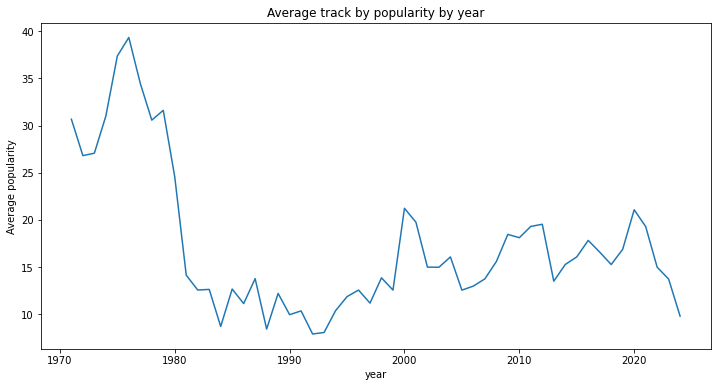

In [21]:
# Popularity distribution
popularity_by_year = tracks.groupby("year")["popularity"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_by_year, x="year", y="popularity")
plt.title("Average track by popularity by year")
plt.xlabel("year")
plt.ylabel("Average popularity")
plt.show()